# Ejemplo de procesamiento de señales para aprendizaje automático

Vamos a tratar los datos para la realización de la práctica 2

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

## Entendiendo los datos

Primero intenta cargar un solo fichero, por ejemplo la grabación 3 del participante 5. Después muestra las primeras 5 líneas.

In [2]:
s_05_03 = pd.read_csv("dataset/data/sub_05/rec_3.csv")
s_05_03

,pelvis_x,pelvis_y,pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,T12_x,...,lowerLegLeft_z,footLeft_x,footLeft_y,footLeft_z,toeLeft_x,toeLeft_y,toeLeft_z,vel_x,vel_y,vel_z
0,10.825740,1.687339,0.901162,10.821957,1.688543,0.998533,10.801117,1.684932,1.103688,10.789364,...,0.489737,10.847054,1.590837,0.086303,10.690569,1.543336,0.040219,0.101791,0.048034,0.061909
1,10.826746,1.687909,0.901579,10.822491,1.689396,0.998923,10.801186,1.686003,1.103991,10.789015,...,0.490681,10.847797,1.591756,0.087400,10.691583,1.544044,0.040627,0.106294,0.052266,0.062296
2,10.827751,1.688479,0.901995,10.823026,1.690249,0.999314,10.801255,1.687074,1.104293,10.788665,...,0.491625,10.848540,1.592674,0.088496,10.692597,1.544752,0.041036,0.110797,0.056498,0.062684
3,10.828800,1.688855,0.902391,10.823661,1.690839,0.999687,10.801457,1.687831,1.104582,10.788469,...,0.492438,10.849213,1.593081,0.089413,10.693475,1.544821,0.041617,0.107863,0.051933,0.059625
4,10.829987,1.688930,0.902780,10.824518,1.691051,1.000055,10.801913,1.688148,1.104867,10.788529,...,0.493119,10.849844,1.592494,0.090127,10.694226,1.543555,0.042641,0.090787,0.030129,0.052072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,12.287813,3.559114,0.872732,12.282033,3.558406,0.970011,12.287307,3.563352,1.077030,12.283078,...,0.485565,12.453883,3.669277,0.085178,12.580044,3.771224,0.033707,0.738760,0.695838,0.018750
4085,12.302245,3.569132,0.872710,12.295888,3.567646,0.969941,12.300804,3.572346,1.076987,12.296369,...,0.487534,12.454711,3.669299,0.085993,12.580380,3.770892,0.033078,0.778252,0.629002,0.003303
4086,12.315103,3.577985,0.873094,12.308156,3.575964,0.970277,12.312706,3.580484,1.077346,12.308060,...,0.488793,12.455188,3.669139,0.086549,12.580490,3.770569,0.032892,0.802324,0.576944,0.002760
4087,12.330029,3.588280,0.874716,12.322240,3.586081,0.971831,12.326201,3.590459,1.078929,12.321174,...,0.488384,12.455557,3.669128,0.086180,12.580592,3.770624,0.031999,0.773953,0.555429,0.058051


### Correlación entre datos
Echad un ojo a cómo están correlacionados los datos entre sí, pero usad un número limitado de columnas para que podamos estudiar el gráfico adecuadamente (18, por ejemplo).

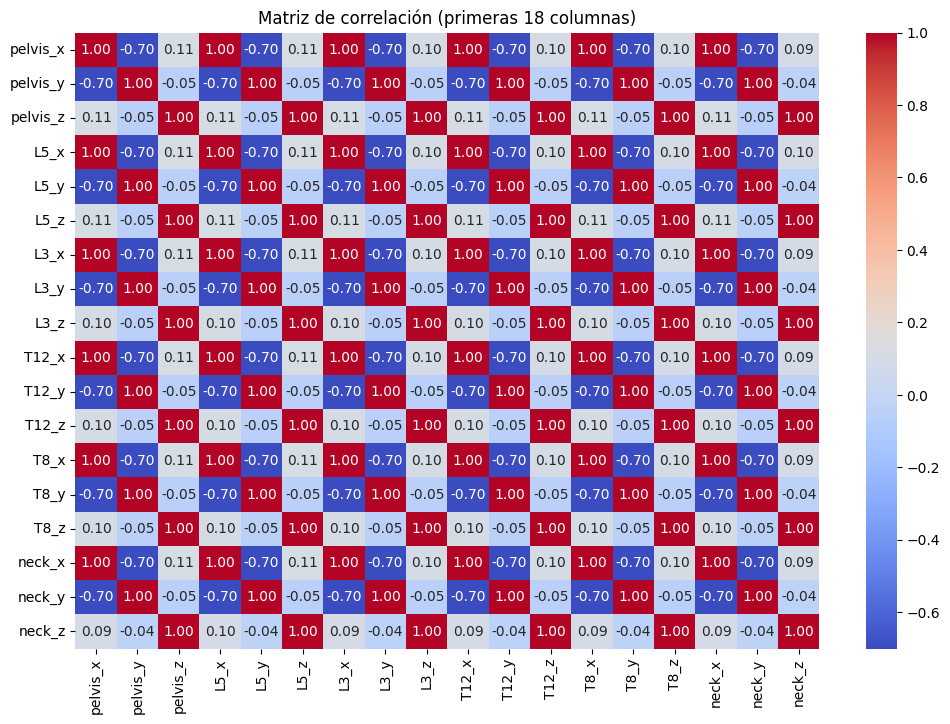

In [3]:
# Calcula la matriz de correlación
correlation_matrix = s_05_03.iloc[:, :18].corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación (primeras 18 columnas)")
plt.show()

Hay un patrón curioso en los datos y es que todos las coordnadas en sus respectivos ejes están muy correlacionados entre sí. Aquí hay 2 posibles conclusiones:

* Asumir que hay información redundante y que podemos cargarnos muchas de las columnas.
* Entender lo que significan los datos y darse cuenta que la posición global de los puntos influye más que el movimiento relativo.

Os voy adelantando que es el segundo caso y que es posible eliminar esas correlaciones sin eliminar información. Para ello, la clave es restar la posición de la pelvis al del resto de posiciones, ya que esta representa la posición general del cuerpo.

In [10]:
# Copia del DataFrame original
resta = s_05_03.copy()

# Itera de tres en tres columnas, comenzando desde la cuarta columna
for i in range(3, resta.shape[1], 3):  # Empieza en la columna 3 y avanza de 3 en 3
    resta.iloc[:, i:i+3] -= s_05_03.iloc[:, 0:3].values  # Resta las columnas X, Y, Z de la pelvis

#Ahora vamos a afinar un poco mas
resta2 = resta.copy()
for j in range(67, 67+3, 1): #Tiene en cuenta las partes del cuerpo que dependen de otras, no solo de la pelvis
    resta2.iloc[:,j] -= resta2.iloc[:, j-3].values
    resta2.iloc[:,j-12] -= resta2.iloc[:, j-3-12].values
    resta2.iloc[:,j-24] -= resta2.iloc[:, j-3-24].values
    resta2.iloc[:,j-36] -= resta2.iloc[:, j-3-36].values

for j in range(19, 19+3, 1):
    resta2.iloc[:,j] -= resta2.iloc[:, j-3].values



,pelvis_x,pelvis_y,pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,T12_x,...,lowerLegLeft_z,footLeft_x,footLeft_y,footLeft_z,toeLeft_x,toeLeft_y,toeLeft_z,vel_x,vel_y,vel_z
0,10.825740,1.687339,0.901162,-0.003783,0.001204,0.097371,-0.024623,-0.002407,0.202526,-0.036376,...,-0.411425,0.021314,-0.096502,-0.814859,-0.135171,-0.047501,-0.046084,-10.588778,-1.639305,-0.839253
1,10.826746,1.687909,0.901579,-0.004255,0.001487,0.097344,-0.025560,-0.001906,0.202412,-0.037731,...,-0.410898,0.021051,-0.096153,-0.814179,-0.135163,-0.047712,-0.046773,-10.585289,-1.635643,-0.839283
2,10.827751,1.688479,0.901995,-0.004725,0.001770,0.097319,-0.026496,-0.001405,0.202298,-0.039086,...,-0.410370,0.020789,-0.095805,-0.813499,-0.135154,-0.047922,-0.047460,-10.581800,-1.631981,-0.839311
3,10.828800,1.688855,0.902391,-0.005139,0.001984,0.097296,-0.027343,-0.001024,0.202191,-0.040331,...,-0.409953,0.020413,-0.095774,-0.812978,-0.135325,-0.048260,-0.047796,-10.585612,-1.636922,-0.842766
4,10.829987,1.688930,0.902780,-0.005469,0.002121,0.097275,-0.028074,-0.000782,0.202087,-0.041458,...,-0.409661,0.019857,-0.096436,-0.812653,-0.135761,-0.048939,-0.047486,-10.603439,-1.658801,-0.850708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,12.287813,3.559114,0.872732,-0.005780,-0.000708,0.097279,-0.000506,0.004238,0.204298,-0.004735,...,-0.387167,0.166070,0.110163,-0.787554,0.292231,0.101947,-0.051471,-11.841284,-2.863276,-0.853982
4085,12.302245,3.569132,0.872710,-0.006357,-0.001486,0.097231,-0.001441,0.003214,0.204277,-0.005876,...,-0.385176,0.152466,0.100167,-0.786717,0.278135,0.101593,-0.052915,-11.802128,-2.940130,-0.869407
4086,12.315103,3.577985,0.873094,-0.006947,-0.002021,0.097183,-0.002397,0.002499,0.204252,-0.007043,...,-0.384301,0.140085,0.091154,-0.786545,0.265387,0.101430,-0.053657,-11.778166,-3.001041,-0.870334
4087,12.330029,3.588280,0.874716,-0.007789,-0.002199,0.097115,-0.003828,0.002179,0.204213,-0.008855,...,-0.386332,0.125528,0.080848,-0.788536,0.250563,0.101496,-0.054181,-11.806639,-3.032851,-0.816665


Como puede verse todavía hay elementos que están muy correlacionados entre sí. Eso se debe a que las posiciones de cada articulación del cuerpo depende de otra articulación previa que la mueve. Es posible eliminar todas esas correlaciones usando la misma estrategia que con la pelvis, pero para este caso, ya tenemos suficiente información. Aún así, os lo planteo como reto para hacer una limpieza más fina de los datos. Ahora podríamos plantear eliminar columnas muy correlacionadas entre sí, pero lo dejaremos para una fase posterior.

### Visualización de los datos
Hay muchos elementos interesantes a visualizar así, vamos a empezar con la trayectoria que sigue el movimiento general representado por la pelvis.

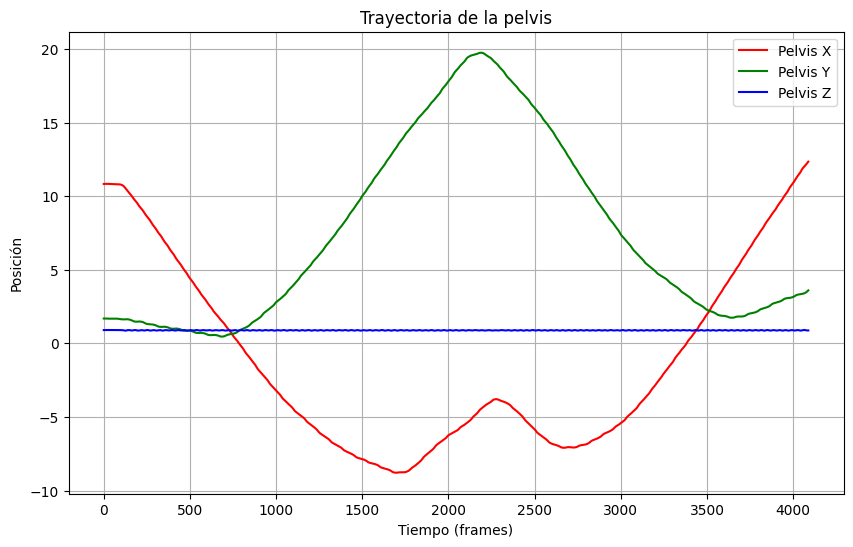

In [15]:
# Graficar la trayectoria de la pelvis
plt.figure(figsize=(10, 6))

# Coordenadas X, Y, Z de la pelvis (asumiendo que están en las primeras tres columnas)
plt.plot(s_05_03.iloc[:, 0], label='Pelvis X', color='r')
plt.plot(s_05_03.iloc[:, 1], label='Pelvis Y', color='g')
plt.plot(s_05_03.iloc[:, 2], label='Pelvis Z', color='b')

# Configuración del gráfico
plt.title("Trayectoria de la pelvis")
plt.xlabel("Tiempo (frames)")
plt.ylabel("Posición")
plt.legend()
plt.grid()
plt.show()

Ahora vamos a definir una función que nos permita graficar la posición tridimensional de los puntos a partir de los datos básicos previamente a la eliminación de las correlaciones. La definición de la función debería ser la siguiente:

*def plot_frame(data: pd.DataFrame, i_frame: int) -> (matplotlib.figure.Figure, matplotlib.axes.Axes)*

Nota: Los valores devuletos corresponden a una figura y unos ejes donde se pintará el resultado. Es conveniente evitar usar plt.show() en la función para luego poder combinar varias si lo necesitamos.

Ten en cuenta que las últimas 3 coordenadas corresponden a la velocidad y que no será relevante en esta gráfica. También considera que para visualizarlo adecuadamente necesitarás que la escala sea la misma en los 3 ejes. A partir de esta idea, se puede elaborar para graficar animaciones. El problema de las animaciones es que se tardan bastante en ver y no se puede visualizar del tirón varios segmentos.

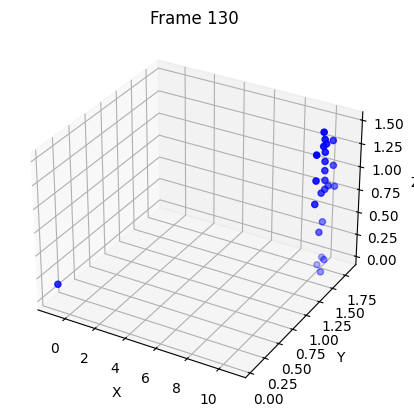

In [41]:
def plot_frame(data, i_frame = 0):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    x = data.iloc[i_frame, 0::3]  # Columnas X
    y = data.iloc[i_frame, 1::3]  # Columnas Y
    z = data.iloc[i_frame, 2::3]  # Columnas Z
    ax.scatter(x, y, z, c='b', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Frame {i_frame}')
    return fig, ax

fig, ax =  plot_frame(s_05_03, 130)
plt.show()

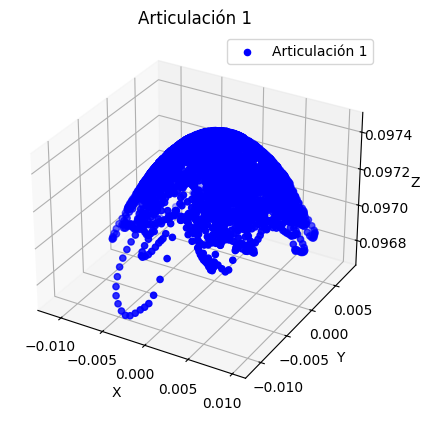

In [39]:
def plot_joint(data, joint_i):
    """
    Grafica la trayectoria de una articulación específica en 3D a lo largo de todos los frames.

    Args:
        data (pd.DataFrame): DataFrame que contiene las coordenadas X, Y, Z de las articulaciones.
        joint_i (int): Índice de la articulación (se asume que las columnas están organizadas en bloques de 3: X, Y, Z).

    Returns:
        fig (plt.Figure): Figura del gráfico.
        ax (plt.Axes): Ejes del gráfico.
    """
    # Crear la figura y los ejes 3D
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Extraer las coordenadas X, Y, Z para la articulación especificada
    x = data.iloc[:, joint_i]
    y = data.iloc[:, joint_i + 1]
    z = data.iloc[:, joint_i + 2]

    # Graficar los puntos de la articulación en 3D
    ax.scatter(x, y, z, label=f'Articulación {joint_i // 3}', color='b', marker='o')

    # Configurar etiquetas y escalas
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Articulación {joint_i // 3}')
    ax.legend()

    return fig, ax

# Llamar a la función para graficar la trayectoria de una articulación
fig, ax = plot_joint(resta, 3)  # Cambia el índice según la articulación que quieras graficar
plt.show()

Vale, ese gráfico está muy bien, pero no resulta muy útil para ver cómo se ha movido exactamente una articulación. Ahora intentaremos mostrar eso, también en 3D, pero en vez de enseñar una línea de puntos. Para ello será necesario definir la siguiente función:

*def plot_joint(data: pd.DataFrame, i_joint: int) -> (matplotlib.figure.Figure, matplotlib.axes.Axes)*

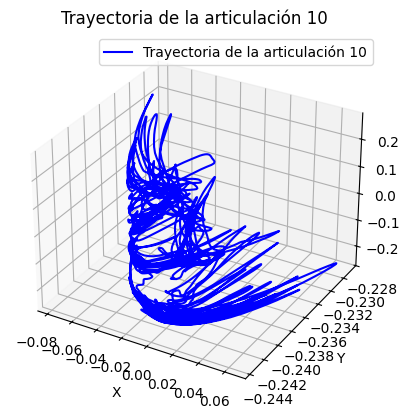

In [ ]:
def plot_joint(data, joint_i):
    """
    Grafica la trayectoria de una articulación específica en 3D a lo largo de todos los frames.

    Args:
        data (pd.DataFrame): DataFrame que contiene las coordenadas X, Y, Z de las articulaciones.
        joint_i (int): Índice de la articulación (se asume que las columnas están organizadas en bloques de 3: X, Y, Z).

    Returns:
        fig (plt.Figure): Figura del gráfico.
        ax (plt.Axes): Ejes del gráfico.
    """
    # Crear la figura y los ejes 3D
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Extraer las coordenadas X, Y, Z para la articulación especificada
    x = data.iloc[:, joint_i]
    y = data.iloc[:, joint_i + 1]
    z = data.iloc[:, joint_i + 2]

    # Graficar la trayectoria de la articulación en 3D
    ax.plot(x, y, z, label=f'Trayectoria de la articulación {joint_i // 3}', color='b')

    # Configurar etiquetas y escalas
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Trayectoria de la articulación {joint_i // 3}')
    ax.legend()

    return fig, ax

# Llamar a la función para graficar la trayectoria de una articulación
fig, ax = plot_joint(resta, 31)  # Mano derecha 31
plt.show()

## Ventaneo
Una normalización importante de los datos, es asegurarse que todos tengan el mismo formato. En este caso pretendemos que se separen en segmentos con la misma duración, específicamente de 4 segundos. Para poder aplicarlo apropiadamente a otras grabaciones, define una función que haga este ventaneo. Piensa en qué parámetros debería recibir.

In [42]:
freq =60
segundos = 4
ventana = freq*segundos
a=[]
for i in range(0,len(resta)-ventana+1, ventana):
  a.append(resta.iloc[i:i+ventana])

## Extracción de características
Una vez están definidas las ventanas, el siguiente paso consiste en calcular métricas que puedan resultarnos de utilidad para resumir la señal. Existen muchas muy útiles que os invito a buscar, aunque para este ejemplo queremos las siguientes:

* Media
* Desviación típica
* [Energía de la señal](https://en.wikipedia.org/wiki/Energy_(signal_processing)

Es importante tener en cuenta sobre qué eje hay que aplicar las fórmulas.

In [43]:
# Función para calcular la energía de la señal
def calcular_energia(serie):
    return (serie**2).sum()

# Crear un DataFrame para almacenar las características
caracteristicas = []

# Iterar sobre las ventanas de datos
for ventana in a:  # 'a' contiene las ventanas creadas previamente
    # Calcular características para cada eje (X, Y, Z)
    media = ventana.mean()
    desviacion = ventana.std()
    energia = ventana.apply(calcular_energia)

    # Combinar las características en un solo DataFrame
    caracteristicas.append(pd.DataFrame({
        'Media': media,
        'Desviación Típica': desviacion,
        'Energía': energia
    }).T)

# Combinar todas las ventanas en un solo DataFrame
caracteristicas_df = pd.concat(caracteristicas, keys=range(len(caracteristicas)))

# Mostrar las características calculadas
print(caracteristicas_df)

                          pelvis_x      pelvis_y    pelvis_z      L5_x  \
0  Media                 10.266570      1.596698    0.893378  0.000127   
   Desviación Típica      0.652334      0.092091    0.013377  0.004083   
   Energía            25398.296301    613.893257  191.592557  0.003988   
1  Media                  6.803331      1.098699    0.885822  0.006018   
   Desviación Típica      1.167956      0.144709    0.012382  0.001752   
   Energía            11434.500695    294.718148  188.360004  0.009426   
2  Media                  2.833868      0.641258    0.884961  0.006140   
   Desviación Típica      1.090050      0.124658    0.012028  0.002093   
   Energía             2211.376618    102.404843  187.991963  0.010094   
3  Media                 -0.853129      1.289142    0.883986  0.005256   
   Desviación Típica      1.073433      0.530624    0.013179  0.001901   
   Energía              450.068591    466.146591  187.585154  0.007493   
4  Media                 -4.168556    

Con esto, ya tendríamos preparadas las piezas básicas para montar el puzzle, solo nos queda llevar a cabo la carga para cada participante.

## Carga y combinación de ficheros
Ahora carga todos los ficheros y combínalos en uno solo manteniendo la información sobre a qué participante grabación corresponden. Te recomiendo investigar las funciones de la librería os que incluye Python para ver funciones que listen automáticamente los ficheros de una carpeta.

In [13]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los ficheros
ruta_carpeta = "dataset/data"

# Lista para almacenar los DataFrames
dataframes = []

# Recorrer todos los subdirectorios y archivos en la carpeta
for subdir, _, files in os.walk(ruta_carpeta):
    for file in files:
        if file.endswith(".csv"):  # Asegurarse de procesar solo archivos CSV
            # Construir la ruta completa del archivo
            ruta_archivo = os.path.join(subdir, file)
            
            # Cargar el archivo CSV en un DataFrame
            df = pd.read_csv(ruta_archivo)
            
            # Agregar una columna para identificar el archivo (opcional)
            df['Archivo'] = file
            
            # Agregar el DataFrame a la lista
            dataframes.append(df)

# Combinar todos los DataFrames en uno solo
datos_combinados = pd.concat(dataframes, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(datos_combinados)

         pelvis_x   pelvis_y  pelvis_z       L5_x       L5_y      L5_z  \
0        5.290658  10.270959  0.928399   5.295636  10.278010  1.024168   
1        5.290281  10.270359  0.928462   5.295316  10.277418  1.024227   
2        5.289904  10.269758  0.928525   5.294997  10.276826  1.024286   
3        5.289517  10.269149  0.928582   5.294664  10.276223  1.024340   
4        5.289107  10.268520  0.928633   5.294305  10.275599  1.024388   
...           ...        ...       ...        ...        ...       ...   
910175 -13.191125  -4.276095  0.864696 -13.207554  -4.263599  0.951469   
910176 -13.188855  -4.278840  0.865306 -13.205634  -4.266824  0.952080   
910177 -13.186731  -4.281594  0.865901 -13.203759  -4.270072  0.952694   
910178 -13.184691  -4.284377  0.866507 -13.201894  -4.273358  0.953329   
910179 -13.182650  -4.287161  0.867113 -13.200030  -4.276644  0.953964   

             L3_x       L3_y      L3_z      T12_x  ...  footLeft_x  \
0        5.294113  10.278961  1.128732   

### Normalización por participante
Esto es importante hacerlo para descartar el efecto de las diferentes dimensiones de cada persona en los resultados, ya que lo que queremos hacer es estudiar los tipos de movimiento como tal.

In [14]:
# Normalización por participante
def normalizar_participante(grupo):
    # Restar la media y dividir entre la desviación estándar (estandarización)
    return (grupo - grupo.mean()) / grupo.std()

# Agrupar por la columna que identifica al participante (por ejemplo, 'Archivo')
datos_normalizados = datos_combinados.groupby('Archivo').transform(normalizar_participante)

# Mantener la columna identificadora del participante
datos_normalizados['Archivo'] = datos_combinados['Archivo']

# Mostrar las primeras filas del DataFrame normalizado
print(datos_normalizados)

        pelvis_x  pelvis_y  pelvis_z      L5_x      L5_y      L5_z      L3_x  \
0       1.019214  1.586401  0.596789  1.019926  1.587518  0.574034  1.019801   
1       1.019165  1.586317  0.598005  1.019884  1.587435  0.575082  1.019770   
2       1.019115  1.586233  0.599221  1.019842  1.587352  0.576131  1.019739   
3       1.019064  1.586147  0.600321  1.019799  1.587268  0.577091  1.019707   
4       1.019010  1.586059  0.601305  1.019751  1.587180  0.577944  1.019671   
...          ...       ...       ...       ...       ...       ...       ...   
910175 -1.327479 -0.026855 -0.660905 -1.329200 -0.025573 -0.744658 -1.329780   
910176 -1.327252 -0.027138 -0.648687 -1.329009 -0.025905 -0.733369 -1.329575   
910177 -1.327040 -0.027422 -0.636770 -1.328822 -0.026240 -0.722023 -1.329369   
910178 -1.326837 -0.027709 -0.624633 -1.328636 -0.026579 -0.710290 -1.329161   
910179 -1.326633 -0.027996 -0.612495 -1.328450 -0.026918 -0.698557 -1.328954   

            L3_y      L3_z     T12_x  .

## Juntar todo
El último paso será utilizar todos los conocimientos desarrollados durante este notebook y combinarlos para realizar el prcoesamiento previo necesario para la segunda práctica.